Group Member:

2301956531 - Sovia Agustina Ikka

2301961084 - Vangelia Peace Palijama



In [ ]:
# !pip install --upgrade tensorflow==1.15

Requirement already up-to-date: tensorflow==1.15 in /usr/local/lib/python3.7/dist-packages (1.15.0)


## **IMPORT LIBRARY**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
print(tf.__version__)

1.15.0


## **IMPORT DATASET**

In [ ]:
df = pd.read_csv("clustering.csv")
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,4,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
1,e,x,s,9,1,a,e,2,2,2,7,7,p,2,1,4,3,n,g
2,e,b,s,8,1,l,e,2,2,2,7,7,p,2,1,4,3,n,m
3,p,x,y,8,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
4,e,x,s,3,0,n,t,3,2,2,7,7,p,2,1,0,3,a,g
5,e,x,y,9,1,a,e,2,2,2,7,7,p,2,1,4,2,n,g
6,e,b,s,8,1,a,e,2,2,2,7,7,p,2,1,4,2,n,m
7,e,b,y,8,1,l,e,2,2,2,7,7,p,2,1,4,3,s,m
8,p,x,y,8,1,p,e,3,2,2,7,7,p,2,1,4,2,v,g
9,e,b,s,9,1,a,e,2,2,2,7,7,p,2,1,4,2,s,m


## **FEATURE SELECTION**

In [ ]:
for index, i in enumerate(df['odor']):
    if (i == "a"):
        df['odor'][index] = 1
    elif (i == "l"):
        df['odor'][index] = 2
    elif (i == "c"):
        df['odor'][index] = 3
    elif (i == "y"):
        df['odor'][index] = 4
    elif (i == "f"):
        df['odor'][index] = 5
    elif (i == "m"):
        df['odor'][index] = 6
    elif (i == "n"):
        df['odor'][index] = 7
    elif (i == "p"):
        df['odor'][index] = 8
    elif (i == "s"):
        df['odor'][index] = 9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/d

In [ ]:
for index, i in enumerate(df['stalk-shape']):
    if (i == "e"):
        df['stalk-shape'][index] = 1
    elif (i == "t"):
        df['stalk-shape'][index] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for index, i in enumerate(df['veil-type']):
    if (i == "p"):
        df['veil-type'][index] = 1
    elif (i == "u"):
        df['veil-type'][index] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,4,1,8,1,3,2,2,7,7,1,2,1,4,2,s,u
1,e,x,s,9,1,1,1,2,2,2,7,7,1,2,1,4,3,n,g
2,e,b,s,8,1,2,1,2,2,2,7,7,1,2,1,4,3,n,m
3,p,x,y,8,1,8,1,3,2,2,7,7,1,2,1,4,2,s,u
4,e,x,s,3,0,7,2,3,2,2,7,7,1,2,1,0,3,a,g


In [ ]:
dataset = df[['class', 'odor', 'bruises', 'stalk-shape', 'veil-type', 'spore-print-color']]
dataset.head()

,class,odor,bruises,stalk-shape,veil-type,spore-print-color
0,p,8,1,1,1,2
1,e,1,1,1,1,3
2,e,2,1,1,1,3
3,p,8,1,1,1,2
4,e,7,0,2,1,3


In [ ]:
# Mengecek null value, jika ada maka akan diisi menggunakan fillna:
dataset = dataset.fillna(dataset.mean())
dataset.isnull().sum()

class                0
odor                 0
bruises              0
stalk-shape          0
veil-type            0
spore-print-color    0
dtype: int64

## **SPLIT DATASET**

In [ ]:
x = dataset.drop(['class'], axis = 1)
y = dataset['class'].values.reshape(-1, 1)

## **FEATURE EXTRACTION USING PCA**

In [ ]:
def calculate_mean(dataset):
  return tf.reduce_mean(dataset, axis = 0)

### Normalize Data

In [ ]:
def normalize_dataset(dataset, mean):
  return dataset - mean

### Analyze Data Using PCA

In [ ]:
def apply_pca(normalize_dataset):
    pca = PCA(n_components = 3)
    pca = pca.fit(normalize_dataset)
    return pca.transform(normalize_dataset)

In [ ]:
dx = x.to_numpy()
dx

array([[8, 1, 1, 1, 2],
       [1, 1, 1, 1, 3],
       [2, 1, 1, 1, 3],
       ...,
       [1, 1, 1, 1, 3],
       [1, 1, 1, 1, 3],
       [2, 1, 1, 1, 2]])

In [ ]:
mean = calculate_mean(dx)
dx = normalize_dataset(dx, mean)

In [ ]:
with tf.Session() as sess:
    dx = sess.run(dx)
    result = apply_pca(dx)
    print(result)

[[ 4.88212709 -0.57555758 -0.47670181]
 [-2.11209384  0.23391878 -0.1351819 ]
 [-1.11743085  0.25719477 -0.21298382]
 ...
 [-2.11209384  0.23391878 -0.1351819 ]
 [-2.11209384  0.23391878 -0.1351819 ]
 [-1.08585086 -0.71521352 -0.0098903 ]]


## **ARCHITECTURE**

In [ ]:
class SOM:
    # Constructor
    def __init__(self, width, height, n_features, learning_rate):
        self.width = width
        self.height = height
        self.n_features = n_features
        self.learning_rate = learning_rate

        # self.cluster = [ [] for _ in range(height)]
        # ATAU
        self.cluster = []
        for i in range(height):
            self.cluster.append([])

        self.weight = tf.Variable(
            tf.random.normal(
                [width * height, n_features]
            ),
            tf.float32
        )

        self.input = tf.placeholder(tf.float32, [n_features])
        self.location = []

        for y in range(height):
            for x in range(width):
                self.location.append(
                    tf.cast([y, x], tf.float32)
                )

        self.bmu = self.get_bmu()
        self.update = self.update_neighbor()
 
    # Find the winning Node
    def get_bmu(self):
        distance = tf.sqrt(  # Calculate distance each node
            tf.reduce_mean(
                (self.weight - self.input) ** 2, axis=1
            )
        )

        bmu_index = tf.argmin(distance)
        bmu_location = tf.cast([
            tf.div(bmu_index, self.width), 
            tf.mod(bmu_index, self.width)
            ], tf.float32)
        
        return bmu_location

    # Update neighbor around winning node
    def update_neighbor(self):
        distance = tf.sqrt(
            tf.reduce_mean(
                (self.bmu - self.location) ** 2, axis=1
            )
        )

        # formula untuk rate
        sigma = tf.cast(
            tf.maximum(self.width, self.height) / 2,
            tf.float32
        )

        neighbor_strength = tf.exp(-(distance ** 2) / (2 * sigma ** 2))
        rate = neighbor_strength * self.learning_rate

        stacked_rate = []
        for i in range(self.width * self.height):
            stacked_rate.append(
                tf.tile(
                    [rate[i]],
                    [self.n_features]
                )
            )
        
        delta = stacked_rate * (self.input - self.weight)
        new_weight = self.weight + delta

        return tf.assign(self.weight, new_weight)
    
    def train(self, dataset, num_epochs):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(num_epochs):
                print(f"Epoch {epoch}: ", end='')
                for data in dataset:
                    dic = {
                        self.input: data
                    }
                    sess.run(self.update, feed_dict = dic)
                print('Done')

            location = sess.run(self.location)
            weight = sess.run(self.weight)

            for i, loc in enumerate(location):
                self.cluster[int(loc[0])].append(weight[i])

Keterangan:
*   Width, height = 10
*   Jumlah features = 3
*   Learning rate = 0.1
*   Epoch = 2500

In [ ]:
som = SOM(10, 10, 3, 0.1)
som.train(result, 2500)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 0: Done
Epoch 1: Done
Epoch 2: Done
Epoch 3: Done
Epoch 4: Done
Epoch 5: Done
Epoch 6: Done
Epoch 7: Done
Epoch 8: Done
Epoch 9: Done
Epoch 10: Done
Epoch 11: Done
Epoch 12: Done
Epoch 13: Done
Epoch 14: Done
Epoch 15: Done
Epoch 16: Done
Epoch 17: Done
Epoch 18: Done
Epoch 19: Done
Epoch 20: Done
Epoch 21: Done
Epoch 22: Done
Epoch 23: Done
Epoch 24: Done
Epoch 25: Done
Epoch 26: Done
Epoch 27: Done
Epoch 28: Done
Epoch 29: Done
Epoch 30: Done
Epoch 31: Done
Epoch 32: Done
Epoch 33: Done
Epoch 34: Done
Epoch 35: Done
Epoch 36: Done
Epoch 37: Done
Epoch 38: Done
Epoch 39: Done
Epoch 40: Done
Epoch 41: Done
Epoch 42: Done
Epoch 43: Done
Epoch 44: Done
Epoch 45: Done
Epoch 46: Done
Epoch 47: Done
Epoch 48: Done
Epoch 49: Done
Epoch 50: Done
Epoch 51: Done
Epoch 52: Done
Epoch 53: Done
Epoch 54: Done
Epoch 55: Done
Epoch 56: Done
Epoch 57: Done
Epoch 58: Done
Epoch 59: Done
Epoch 60: Done
Epoch 61: Done
Ep

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

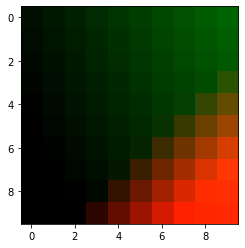

In [ ]:
plt.imshow(som.cluster) # show image pake plt
plt.show

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=55039d84-69f2-422d-ba2a-a931d944300b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>